# Final Project - The Rumos Bank Marketing Campaign


Depois do vosso sucesso no primeiro projecto no The Rumos Bank, surge um novo projecto ainda mais empolgante! 

A equipa de marketing quer lançar uma nova campanha cujo objetivo é convencer os clientes a abrir depósitos a prazo.

Até agora a estratégia era ligar ao máximo número de pessoas, de forma indiscriminada, e tentar vender-lhe o produto. No entanto essa abordagem, para além de gastar mais recursos porque implica ter várias pessoas a ligar a todos os clientes, também é incomóda para alguns clientes que não gostam de ser incomodados com esse tipo de chamadas. Feitas as contas, chegou-se à conclusão que:

    - Por cada cliente identificado como um bom candidado, e é alvo da campanha mas não adere ao depósito a prazo, o banco tem um custo de 500euros.
    - Por cada cliente que é identificado como mau candidado, e como tal não é alvo da campanha mas na verdade era um bom candidado e iria aderir, o banco tem um custo de 2000euros.
    
Com base nesta informação, conseguem ajudar a equipa de marketing criando um modelo que seleccione os melhores candidatos para serem alvos da campanha, de forma a reduzir custos?


Com base na informação dada, podemos definir que:

    True positive - O modelo identifica o cliente como bom candidato e o mesmo adere à campanha.
    True negative - O modelo identifica o cliente como mau candidato e o mesmo não adere à campanha.
    False positive - O modelo identifica o cliente como bom candidato e o mesmo não adere à campanha.
    False negative - O modelo identifica o cliente como mau candidato e o mesmo adere à campanha.

**O dataset contêm informação sobre todos os clientes que foram alvo da campanha:**

    1 - age 
    2 - job : type of job 
    3 - marital : marital status
    4 - education
    5 - default: has credit in default? 
    6 - housing: has housing loan? 
    7 - loan: has personal loan? 
    8 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
    9 - previous: number of contacts performed before this campaign and for this client 
    10 - poutcome: outcome of the previous marketing campaign 
    11 - emp.var.rate: employment variation rate - quarterly indicator 
    12 - cons.price.idx: consumer price index - monthly indicator
    13 - cons.conf.idx: consumer confidence index - monthly indicator 
    14 - euribor3m: euribor 3 month rate - daily indicator 
    15 - nr.employed: number of employees - quarterly indicator 

**Output:**
    
    y: has the client subscribed a term deposit? 
    
   

#### Perguntas:

    1. Quantas features estão disponíveis? Quantos clientes?
    2. Quantos clientes têm no dataset que efectivamente aderiram ao depósito a prazo? E quantos não o fizeram?
    3. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para aderir ao depósito a prazo?
    4. Qual o algoritmo que levou aos melhores resultados?
    5. Qual/Quais as métricas de avaliação que usaram para comparar a performance dos vários modelos? Porquê?
    6. Qual é o custo que o banco tem sem nenhum modelo?
    7. Qual o custo que o banco passa a ter com o vosso modelo?
    
    
    
    

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import   roc_curve, confusion_matrix, accuracy_score, auc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

seed = 42

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/My Drive/ML/Data/bank_marketing_campaign.csv')

Vou analisar o dataset de forma a tentar identificar algumas acções a serem tomadas, verificando a existência de valores nulos, o tipo de features que vou trabalhar, existência de outliers, a existência de missing values.

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 16)

In [6]:
df.isnull().values.any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   pdays           41188 non-null  int64  
 8   previous        41188 non-null  int64  
 9   poutcome        41188 non-null  object 
 10  emp.var.rate    41188 non-null  float64
 11  cons.price.idx  41188 non-null  float64
 12  cons.conf.idx   41188 non-null  float64
 13  euribor3m       41188 non-null  float64
 14  nr.employed     41188 non-null  float64
 15  y               41188 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 5.0+ MB


In [8]:
df.describe()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Vou analisar o conteudo das features categóricas para determinar que técnica a aplicar para as converter em númericas.

In [9]:
categorical_features = list(df.select_dtypes('object').columns)
for col in categorical_features:
  print(col, df[col].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


In [10]:
for col in categorical_features:
  print(col)
  print(df[col].value_counts())

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
poutcome
nonexistent    35563
failure         4252
success   

Ao observar as features categóricas é possível visualizar missing values através da designação "unknown", dado isso vou alterar unknown pela moda de cada feature.

In [11]:
for col in categorical_features:
  df[col] =  df[col].replace('unknown', df[col].mode()[0])

Depois ter observado as features categóricas e missing values nas mesmas vou converte-las em númericas, usando a técnica label encoder para as features default, housing, loan, poutcome e Y e one hot enconding para as features job, marital e education.

In [12]:
encoder_features =['default', 'housing', 'loan', 'poutcome', 'y']

In [13]:
encoder = LabelEncoder()
for col in encoder_features:
  df[col] = encoder.fit_transform(df[col])

In [14]:
df_2 = pd.get_dummies(df, columns=['job', 'marital', 'education'], drop_first=True)

In [15]:
df_2.dtypes

age                                int64
default                            int64
housing                            int64
loan                               int64
pdays                              int64
previous                           int64
poutcome                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int64
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
marital_married                    uint8
marital_single  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe080600438>,
      dtype=object)

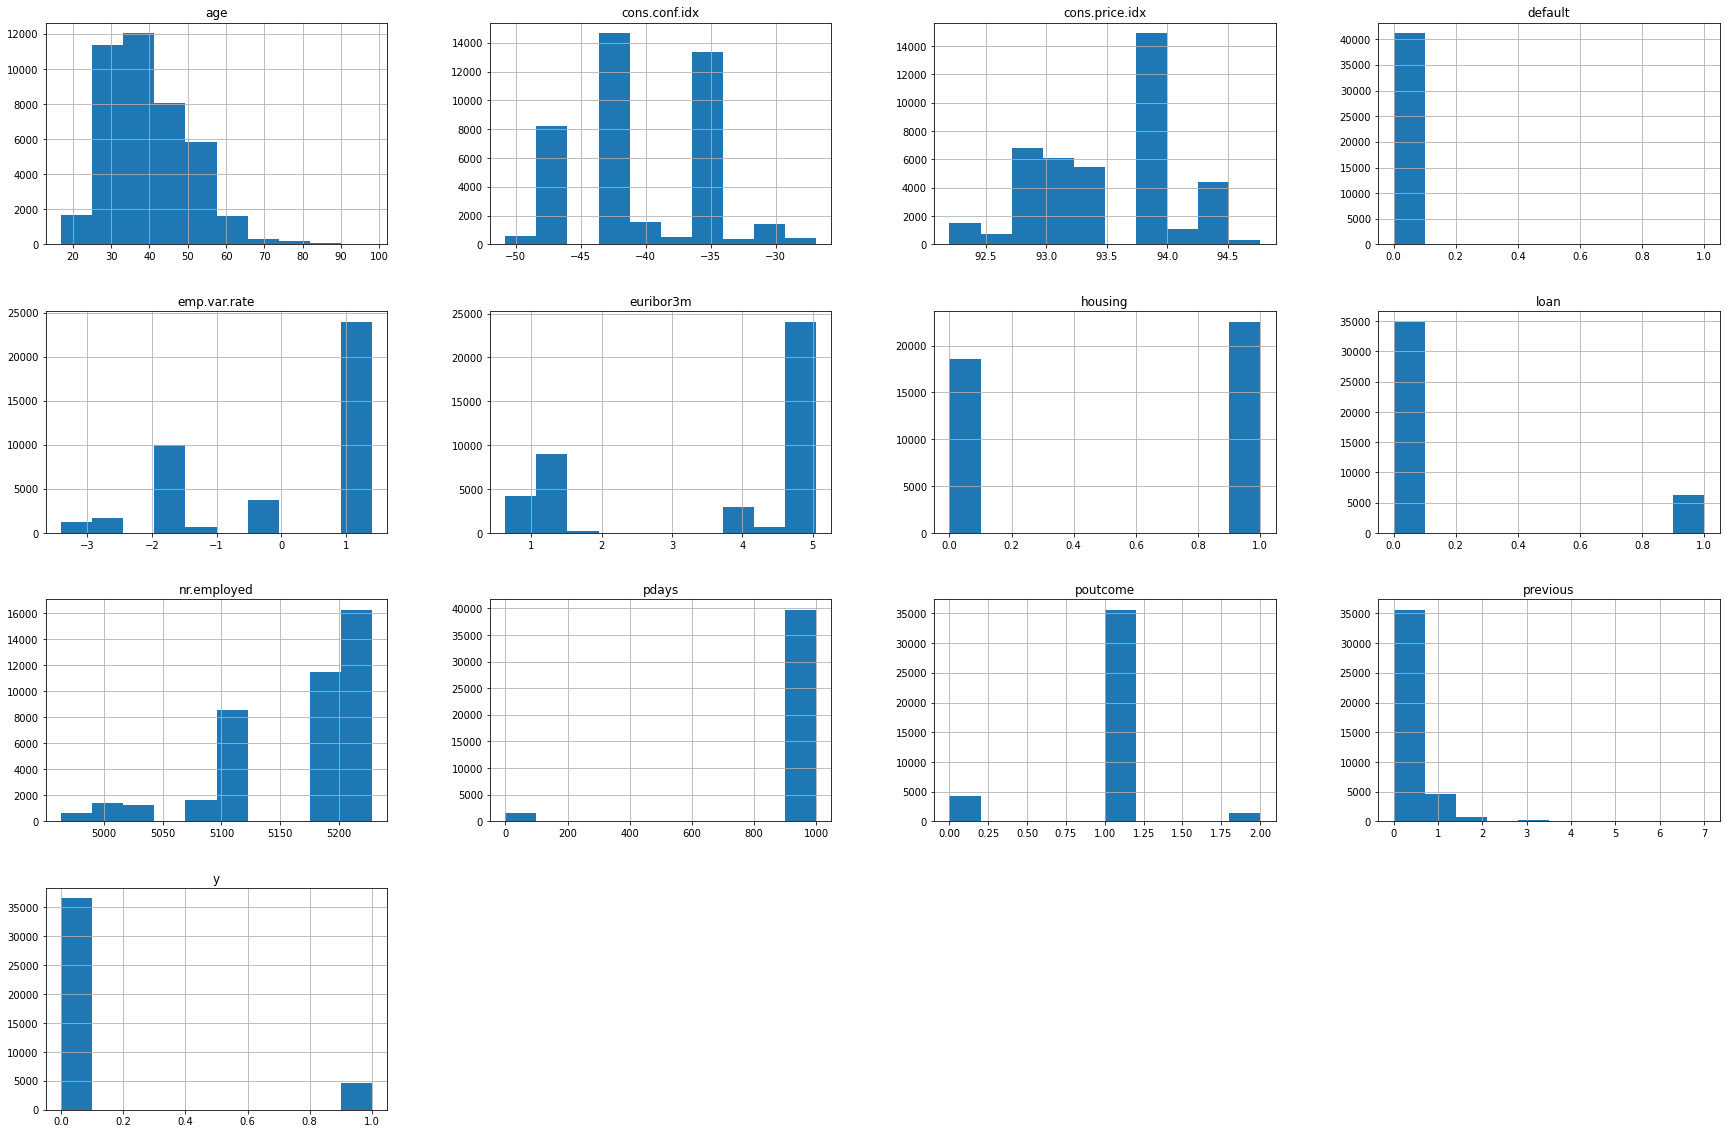

In [16]:
features = df_2.iloc[:, 0:13]
features.hist(figsize=(30,20))

Podemos observar que o dataset não tem uma distribuição normal. Agora vou analisar a correlação entre si e a variável target.

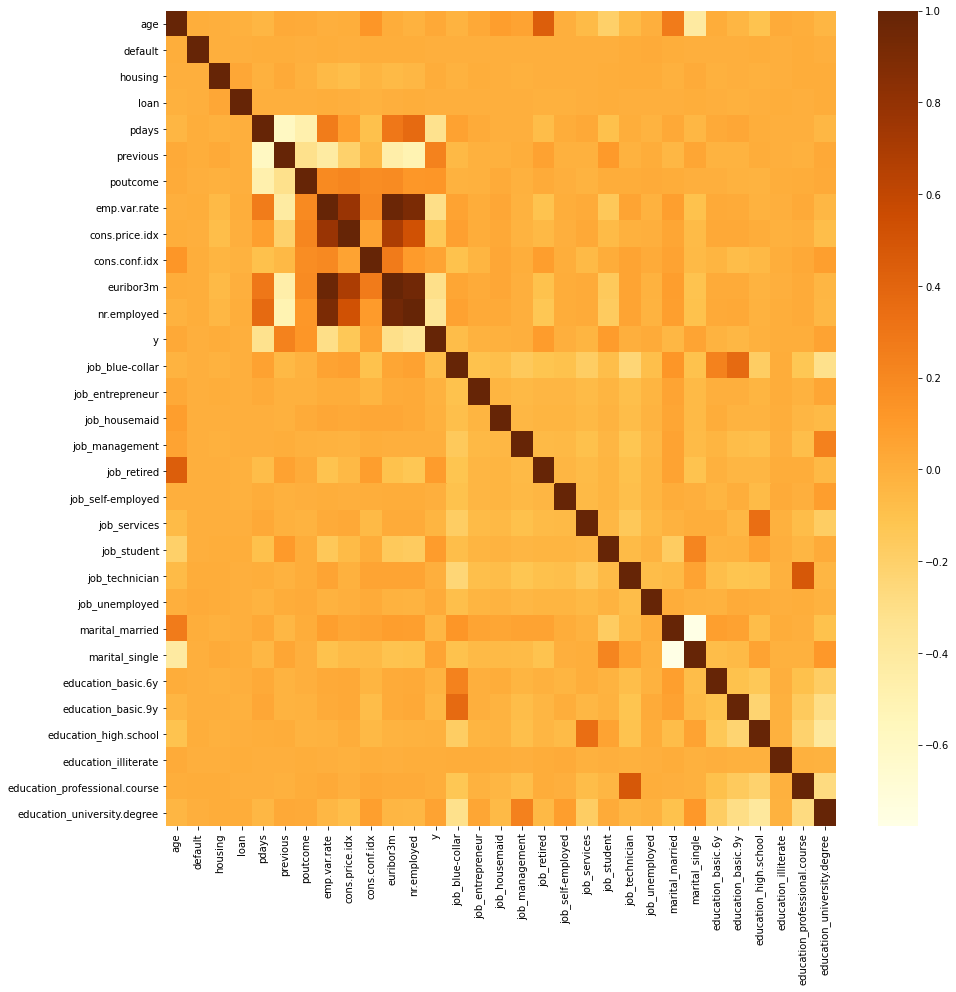

In [17]:
plt.figure(figsize=(15,15))
ax1 = sns.heatmap(df_2.corr(),cmap="YlOrBr")

Podemos observar que temos poucas features preditivas.

#### **Baseline**

Agora vou dividir o dataset em treino e teste e normalizar o mesmo.

In [18]:
train_set, test_set = train_test_split(df_2, test_size = 0.2, random_state = seed)
X_train = train_set.drop(['y'], axis = 'columns')
y_train = train_set['y']

X_test = test_set.drop(['y'], axis = 1)
y_test = test_set['y']

Normalização

In [19]:
scaler = MinMaxScaler()

features_names = X_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = features_names)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = features_names)

Agora vou definir a minha baseline calculando o custo sem ter disponível nenhum modelo.

 *Total_cost= FP * 500 + FN * 2000*

In [20]:
y_preds_all_bad = np.ones(y_test.shape) 

In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 0
Number of True Positives: 935
Number of False Negatives: 0
Number of False Positives: 7303


In [22]:
Total_cost_baseline= fp * 500
print('Total Cost:', Total_cost_baseline)

Total Cost: 3651500


In [23]:
accuracy_score(y_test, y_preds_all_bad)

0.11349842194707453

Se todos os clientes fossem detetados como bons candidatos para a campanha e os mesmos não aderissem à campanha teria um custo de 3,651,500

In [24]:
y_preds_all_good = np.zeros(y_test.shape) 

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_good).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 7303
Number of True Positives: 0
Number of False Negatives: 935
Number of False Positives: 0


In [26]:
Total_cost_baseline_z = fn * 2000
Total_cost_baseline_z 


1870000

In [27]:
accuracy_score(y_test, y_preds_all_good)

0.8865015780529255

se todos os clientes fossem detetados como maus candidatos e poderiam aderir à campanha o banco teria um custo 1,870,000.

Vou identificar como baseline caso o modelo identificasse todos como bons candidatos e os mesmos não aderissem à campanha.

In [28]:
Total_cost_baseline

3651500

In [29]:
def total_cost(y_test, y_preds, threshold = 0.5):
    
    tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds > threshold).ravel()
    
    cost_fn = fn*3000
    cost_fp = fp*1000
    
    return cost_fn + cost_fp

In [30]:
def min_cost_threshold(y_test, y_preds):
    
    costs = {}
    
    for threshold in np.arange(0, 1.1, 0.1):
        
        costs[round(threshold, 1)] = total_cost(y_test, y_preds, threshold = threshold)
        
    plt.plot(list(costs.keys()), list(costs.values()))
    plt.ylabel('Cost')
    plt.xlabel('Threshold')
    plt.show()

In [31]:
def auc_roc_plot(y_test, y_preds):

    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### **Modelos**

**Logistic Regression**

In [32]:
%%time
lr = LogisticRegression(max_iter = 500, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train, y_train)

print("Best estimator:", clf_lr.best_params_)

Best estimator: {'C': 100}
CPU times: user 23.6 s, sys: 11.7 s, total: 35.2 s
Wall time: 17.9 s


In [33]:
clf_lr.score(X_test, y_test)

0.7543092983733916

In [34]:
y_preds_lr = clf_lr.predict_proba(X_test)[:,1]

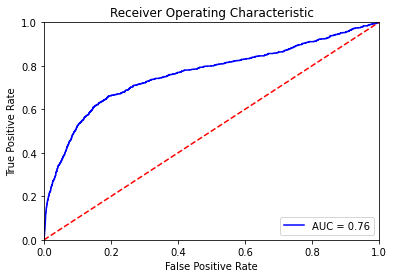

In [35]:
auc_roc_plot(y_test, y_preds_lr)

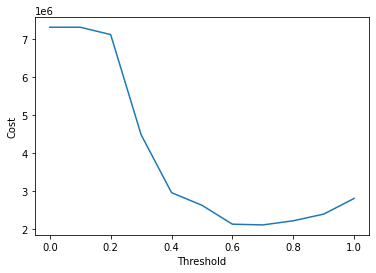

In [36]:
min_cost_threshold(y_test, y_preds_lr)

In [37]:
Total_cost_lr=total_cost(y_test, y_preds_lr, threshold = 0.7)
Total_cost_lr

2108000

In [38]:
Total_cost_lr - Total_cost_baseline

-1543500

O Custo é minimo para um threshold de 0.7: 2,108,000, sendo um custo inferior à da nossa baseline.

**KNN**

In [39]:
for k in range(1, 200, 10):

  k = k + 1

  knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

  acc = knn.score(X_test, y_test)

  print('Accuracy for k =', k, ' is:', acc)

Accuracy for k = 2  is: 0.8854090798737557
Accuracy for k = 12  is: 0.8937848992473901
Accuracy for k = 22  is: 0.8953629521728574
Accuracy for k = 32  is: 0.896698227725176
Accuracy for k = 42  is: 0.8969410050983249
Accuracy for k = 52  is: 0.896698227725176
Accuracy for k = 62  is: 0.896091284292304
Accuracy for k = 72  is: 0.8956057295460063
Accuracy for k = 82  is: 0.8951201747997086
Accuracy for k = 92  is: 0.8948773974265598
Accuracy for k = 102  is: 0.8945132313668366
Accuracy for k = 112  is: 0.8941490653071134
Accuracy for k = 122  is: 0.894027676620539
Accuracy for k = 132  is: 0.8939062879339645
Accuracy for k = 142  is: 0.8937848992473901
Accuracy for k = 152  is: 0.8929351784413693
Accuracy for k = 162  is: 0.8930565671279437
Accuracy for k = 172  is: 0.892571012381646
Accuracy for k = 182  is: 0.8929351784413693
Accuracy for k = 192  is: 0.8926924010682205


In [40]:
%%time
knn = KNeighborsClassifier()

parameters = {'n_neighbors': range(25,65, 2)}

clf_knn = GridSearchCV(knn, parameters, cv = 5).fit(X_train, y_train)

print("Best estimator:", clf_knn.best_params_)

Best estimator: {'n_neighbors': 47}
CPU times: user 12min 1s, sys: 256 ms, total: 12min 2s
Wall time: 12min 2s


In [41]:
y_preds_knn = clf_knn.predict_proba(X_test)[:,1]

clf_knn.score(X_test, y_test)

0.8971837824714737

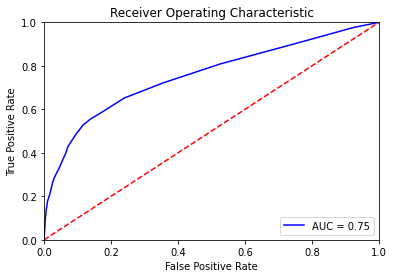

In [42]:
auc_roc_plot(y_test, y_preds_knn)

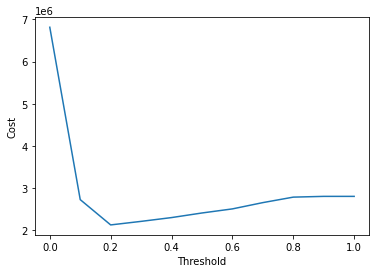

In [43]:
min_cost_threshold(y_test, y_preds_knn)

In [44]:
Total_cost_knn=total_cost(y_test, y_preds_knn, threshold = 0.3)
Total_cost_knn

2212000

In [45]:
Total_cost_knn - Total_cost_lr

104000

In [46]:
Total_cost_knn - Total_cost_baseline

-1439500

O modelo Knn acaba por ser melhor do que a baseline e pior do que o de regressão logística.

**Decision Trees**

In [47]:
%%time

trees = tree.DecisionTreeClassifier(random_state = seed,  class_weight = 'balanced')

parameters = {'max_depth': [2, 5], 'min_samples_split': [2, 3, 6]}

clf_tree = GridSearchCV(trees, parameters, cv = 5).fit(X_train, y_train)

print("Best estimator:", clf_tree.best_params_)

Best estimator: {'max_depth': 5, 'min_samples_split': 2}
CPU times: user 1.46 s, sys: 8.03 ms, total: 1.47 s
Wall time: 1.47 s


In [48]:
y_preds_tree = clf_tree.predict_proba(X_test)[:,1]

clf_tree.score(X_test, y_test)

0.8375819373634378

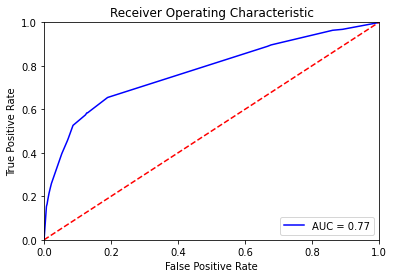

In [49]:
auc_roc_plot(y_test, y_preds_tree)

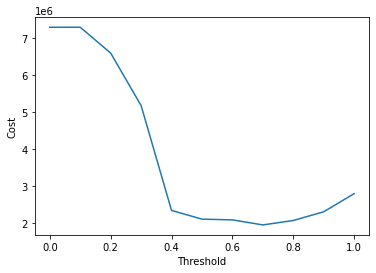

In [50]:
min_cost_threshold(y_test, y_preds_tree)

In [51]:
Total_cost_tree=total_cost(y_test, y_preds_tree, threshold = 0.7)
Total_cost_tree

1960000

In [52]:
Total_cost_tree - Total_cost_lr

-148000

In [53]:
Total_cost_tree - Total_cost_baseline

-1691500

O melhor modelo passou a ser as decision tree dado ter menor custo em relação à regressão logística, e bastante inferior à baseline. Tendo passado para um custo de 1,960,000.

**Random Forests**

In [54]:
%%time 
rf = RandomForestClassifier(random_state = seed,  class_weight = 'balanced').fit(X_train, y_train)

parameters = {'n_estimators':[25, 50, 70, 100]}

clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train, y_train)
print("Best estimator:", clf_rf.best_params_)

Best estimator: {'n_estimators': 70}
CPU times: user 36.9 s, sys: 172 ms, total: 37.1 s
Wall time: 37.1 s


In [55]:
y_preds_rf = clf_rf.predict_proba(X_test)[:,1]

clf_rf.score(X_test, y_test)

0.8749696528283564

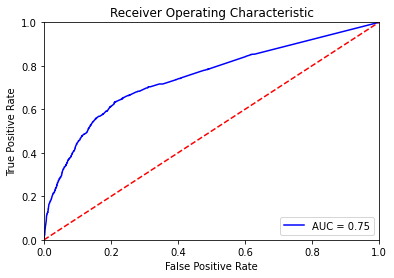

In [56]:
auc_roc_plot(y_test, y_preds_rf)

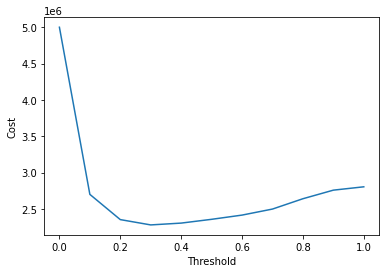

In [57]:
min_cost_threshold(y_test, y_preds_rf)

In [58]:
Total_cost_rf=total_cost(y_test, y_preds_rf, threshold = 0.3)
Total_cost_rf

2281000

In [59]:
Total_cost_rf - Total_cost_tree

321000

In [60]:
Total_cost_rf - Total_cost_baseline

-1370500

O modelo Random forest consegue prever menores custos para o banco no entanto não supera os custos no modelo decision trees.

**Neural Networks**

In [61]:
X_train.shape

(32950, 30)

In [62]:
%%time

mlp = MLPClassifier(solver = 'lbfgs',  random_state = seed )

parameters = {'hidden_layer_sizes': [(27,), (27,10), (27, 10, 2)], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1],'max_iter': [1000]}

clf_mlp = GridSearchCV(mlp, parameters, cv = 5).fit(X_train, y_train)

print("Best estimator:", clf_mlp.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Best estimator: {'hidden_layer_sizes': (27,), 'learning_rate_init': 0.0001, 'max_iter': 1000}
CPU times: user 48min 46s, sys: 25min 19s, total: 1h 14min 6s
Wall time: 37min 31s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [63]:
y_preds_mlp = clf_mlp.predict_proba(X_test)[:,1]

clf_mlp.score(X_test, y_test)

0.8902646273367322

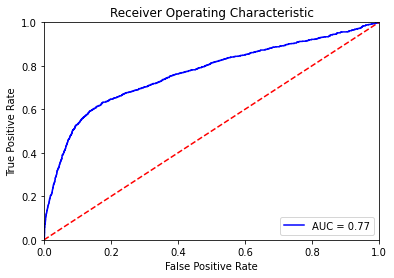

In [64]:
auc_roc_plot(y_test, y_preds_mlp)

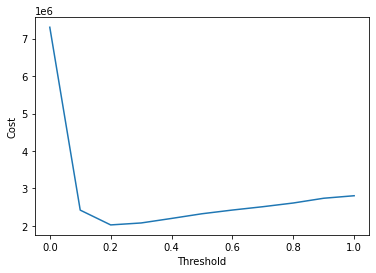

In [65]:
min_cost_threshold(y_test, y_preds_mlp)

In [66]:
Total_cost_mlp=total_cost(y_test, y_preds_mlp, threshold = 0.2)
Total_cost_mlp

2026000

In [67]:
Total_cost_mlp - Total_cost_tree

66000

In [68]:
Total_cost_mlp - Total_cost_baseline

-1625500

O modelo Neural Networks consegue ser melhor que o nosso baseline no entanto o modelo com melhores resultados até aqui é o decision tree.

**SVM**

In [69]:
%%time

svc = SVC(probability = True,random_state=seed)

parameters = {'C':[1] }

clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train, y_train)
print("Best estimator:", clf_svc.best_params_)

Best estimator: {'C': 1}
CPU times: user 18min 4s, sys: 2.53 s, total: 18min 7s
Wall time: 18min 8s


In [70]:
y_preds_svm = clf_svc.predict_proba(X_test)[:,1]

clf_svc.score(X_test, y_test)

0.8971837824714737

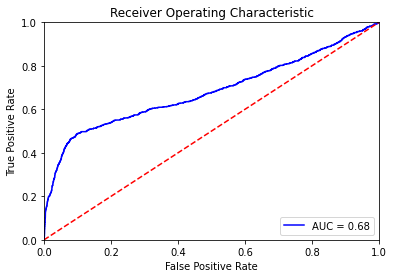

In [71]:
auc_roc_plot(y_test, y_preds_svm)

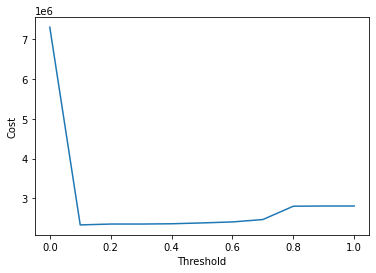

In [72]:
min_cost_threshold(y_test, y_preds_svm)

In [73]:
Total_cost_svm=total_cost(y_test, y_preds_svm, threshold = 0.1)
Total_cost_svm

2329000

In [74]:
Total_cost_svm - Total_cost_tree

369000

In [75]:
Total_cost_mlp - Total_cost_baseline

-1625500

O modelo SVM consegue ter um custo reduzido para o banco em relação à baseline mas no entanto em relação ao modelo Decision tree é mais caro.

#### **P1** 
    
    
    

In [76]:
print('Temos {} Features\nTemos {} Clientes'.format(df.shape[1]-1,df.shape[0]))

Temos 15 Features
Temos 41188 Clientes


In [77]:
print('Após o tratamento de dados ficamos com {} Features e {} Clientes'.format(df_2.shape[1]-1,df_2.shape[0]))

Após o tratamento de dados ficamos com 30 Features e 41188 Clientes


#### **P2**

In [78]:
df_2.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [79]:
print('Tivemos {} Clientes que não subscreveram o empréstimo dando uma percentagem de {:.2%}\nTivemos {} Clientes que subscreveram o empréstimo dando uma percentagem de {:.2%}'.format(df_2.y.value_counts()[0] ,df_2.y.value_counts()[0] / df_2.shape[0],df_2.y.value_counts()[1] ,df_2.y.value_counts()[1] / df_2.shape[0]))

Tivemos 36548 Clientes que não subscreveram o empréstimo dando uma percentagem de 88.73%
Tivemos 4640 Clientes que subscreveram o empréstimo dando uma percentagem de 11.27%


36548 Clientes não subscreveram o empréstimo, 4640 subscreveram o empréstimo.

#### **P3**

In [80]:
features_dt = tree.DecisionTreeClassifier(**clf_tree.best_params_).fit(X_train, y_train)

In [81]:
important_features = pd.DataFrame(data = features_dt.feature_importances_, index = X_train.columns, columns = ['value'])
important_features.sort_values(by = 'value', ascending = False)

,value
nr.employed,0.687114
pdays,0.137380
euribor3m,0.067920
cons.conf.idx,0.066867
age,0.014877
cons.price.idx,0.012289
poutcome,0.006677
previous,0.003333
job_retired,0.001499
job_management,0.001223


As featuras que são mais relevantes para determinar se um cliente é mais propenso em aderir à campanha ou não as nr.employee - number of employees - quarterly indicator  e a pdays - number of days that passed by after the client was last contacted from a previous campaign

#### **P4**

O nosso problema consiste em determinar o custo de uma operação, dado isso a métrica que foi usada foi o cálculo do custo que o banco teria.
O modelo que levou a melhores resultados foi o Decision Tree com um custo de 1,960,000 para o banco.


#### **P5**

O custo que o banco tem, assumindo que todos os clientes eram considerados bons para a campanha é de 3,651,500

#### **P6**

In [82]:
 Total_cost_tree -Total_cost_baseline 

-1691500

In [83]:
Total_cost_tree

1960000

O banco passa a ter um custo de 1,960,000 pelo nosso modelo conseguindo poupar cerca de 1,691,500.